In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import trackpy as tp
import pims as pm

from pims import pipeline
%matplotlib inline

# Particle Localization and Tracking

For a bad example of particle tracking you can go to:

https://nbviewer.jupyter.org/github/aortiza/Notes/blob/master/Rotating%20Mill%20-%2010Hz%20Video/RotatingMill10Hz_ParticleTracking.ipynb

For a better example:
https://soft-matter.github.io/trackpy/v0.3.2/tutorial/walkthrough.html

## Particle Localzation

### Video Reading

In [38]:
@pipeline
def as_gray(frame):
    red = frame[:, :, 0]
    green = frame[:, :, 1]
    blue = frame[:, :, 2]
    return 0.2125 * red + 0.7154 * green + 0.0721 * blue


In [31]:
#frames = pm.ImageSequence('C:Users/aortiza/Desktop/kagome_initial_randon_15mT_1_2018_02_14_14_01_09/*.bmp', as_grey=True)
frames = pm.Video('C:Users/aortiza/Desktop/kagome_initial_randon_15mT_1_2018_02_14_14_01_09.avi')

Frame([[[ 77,  77,  77],
        [ 83,  83,  83],
        [ 86,  86,  86],
        ..., 
        [146, 146, 146],
        [138, 138, 138],
        [128, 128, 128]],

       [[ 79,  79,  79],
        [ 85,  85,  85],
        [ 88,  88,  88],
        ..., 
        [159, 159, 159],
        [158, 158, 158],
        [157, 157, 157]],

       [[ 82,  82,  82],
        [ 88,  88,  88],
        [ 90,  90,  90],
        ..., 
        [103, 103, 103],
        [109, 109, 109],
        [115, 115, 115]],

       ..., 
       [[ 93,  93,  93],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ..., 
        [ 92,  92,  92],
        [ 90,  90,  90],
        [ 88,  88,  88]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ..., 
        [ 82,  82,  82],
        [ 77,  77,  77],
        [ 73,  73,  73]],

       [[ 98,  98,  98],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ..., 
        [ 82,  82,  82],
        [ 77,  77,  77],
        [ 73,  73,  73]]], dtype=uint8)
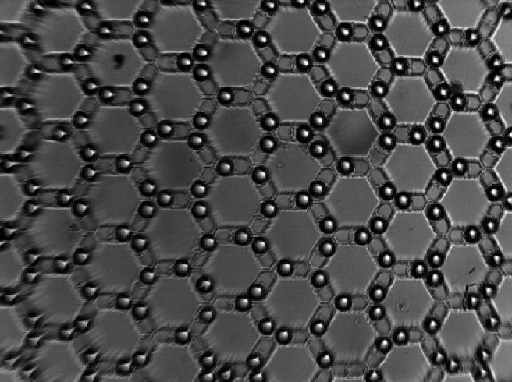

In [33]:
frames[0]

### Particle Localization

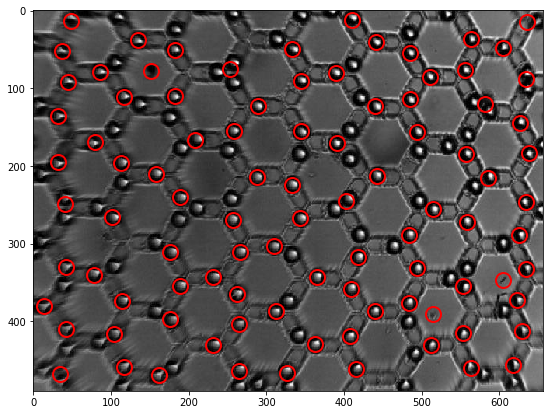

In [39]:
f = tp.locate(as_gray(frames[0]), 31, invert=True)

fig, ax = plt.subplots(1,1,figsize=(10,7))
tp.annotate(f, frames[0]);

In [64]:
positions = tp.batch(as_gray(frames[0:600:20]), 31, invert=True)

Frame 580: 118 features


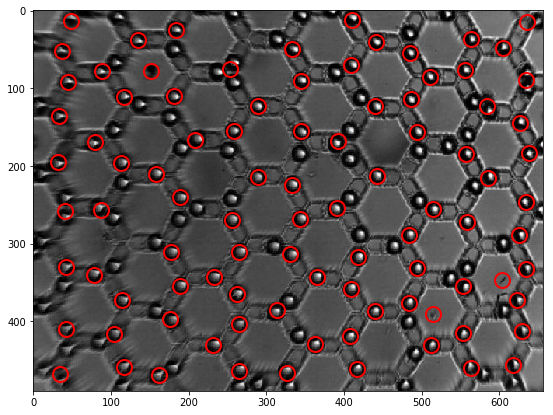

In [67]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
tp.annotate(positions[positions["frame"] == 20], frames[20]);

In [66]:
positions.head()

,x,y,mass,size,ecc,signal,raw_mass,ep,frame
0,48.197971,13.059535,13357.173482,9.000123,0.039155,64.477348,-37379.0,0.089624,0
1,409.918005,12.269815,20501.493924,9.955223,0.166127,72.153223,-39354.0,0.096724,0
2,635.630508,14.843099,17697.496871,10.455022,0.347644,92.878085,-58138.0,0.392308,0
3,563.901283,36.320626,29496.851568,9.288931,0.020542,90.575322,-40314.0,0.100597,0
4,604.907163,48.132944,28516.642360,9.205513,0.071413,95.564641,-45042.0,0.125315,0


## Particle Tracking

In [71]:
traj = tp.link_df(positions, 5, memory=20)

Frame 580: 118 trajectories present


### Pandas

In [72]:
traj.head()

,x,y,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,48.197971,13.059535,13357.173482,9.000123,0.039155,64.477348,-37379.0,0.089624,0,0.0
1,48.182266,13.017156,13175.802733,8.937287,0.035546,64.967925,-37582.0,0.093585,20,0.0
2,409.918005,12.269815,20501.493924,9.955223,0.166127,72.153223,-39354.0,0.096724,0,1.0
3,409.961689,12.232533,20770.899150,9.962851,0.168192,72.656437,-39330.0,0.100370,20,1.0
4,409.990007,12.249654,20577.968316,9.975336,0.164171,73.165425,-39618.0,0.113681,40,1.0


In [73]:
traj.groupby('particle').size().head()

particle
0.0     2
1.0    22
2.0    23
3.0    30
4.0    30
dtype: int64

### Histogram of Trajectory Size

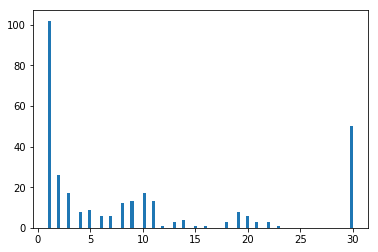

In [81]:
plt.hist(traj.groupby('particle').size(),bins=100);

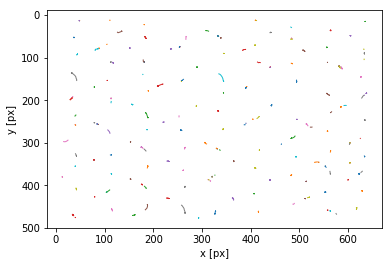

In [82]:
tp.plot_traj(traj)

# Pincushion distortion

????

https://en.wikipedia.org/wiki/Distortion_(optics)#Software_correction

# Colloid to Spin